# Real estate dataset using other techniques of ML using
In this notebook, we will use the real estate dataset to predict the price of a house.
But we will use other techniques of ML to predict the price of a house.
We will use the following techniques:
decision tree in random forest and Artificial Neural Network.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

## Decision Tree Regressor and Random Forest Regressor

In [2]:
# load the dataset
df = pd.read_csv('dataset/Realstate.csv')
df.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,no,yes,no
1,340.0,2.058,4,2,2,1976,no,yes,no
2,250.0,1.780,4,3,2,1980,no,yes,no
3,205.5,1.638,4,2,2,1963,no,yes,no
4,275.5,2.196,4,3,2,1968,no,yes,no


In [3]:
#transform the yes/no column into 1/0
df.Highway.replace(('yes', 'no'), (1, 0), inplace=True)
df.Aircondition.replace(('yes', 'no'), (1, 0), inplace=True)
df.SwimmingPool.replace(('yes', 'no'), (1, 0), inplace=True)
df.head()

,SalePrice,Size,Beds,Baths,Num_Garage,Year,Highway,Aircondition,SwimmingPool
0,360.0,3.032,4,4,2,1972,0,1,0
1,340.0,2.058,4,2,2,1976,0,1,0
2,250.0,1.780,4,3,2,1980,0,1,0
3,205.5,1.638,4,2,2,1963,0,1,0
4,275.5,2.196,4,3,2,1968,0,1,0


In [4]:
#define features and target
features = df[['Size', 'Highway']]
target = df['SalePrice']

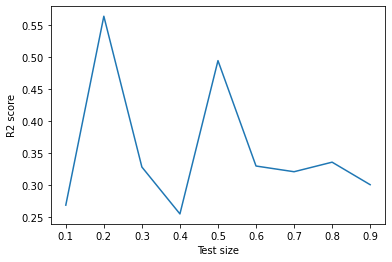

In [5]:
#plot the rsquared values in function of the test size
test_size = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
r2_values = []
for i in test_size:
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=i)
    regressor = DecisionTreeRegressor()
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2_values.append(r2_score(y_test, y_pred))

plt.plot(test_size, r2_values)
plt.xlabel('Test size')
plt.ylabel('R2 score')
plt.show()

In [6]:
#initialize the train set and test set using test size = 0.4
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

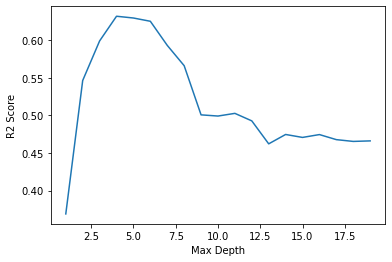

In [7]:
#initialize the tree regressor model

regressor = DecisionTreeRegressor(random_state=0)

#Loop over a range of different maximum depths
r2_score_list = []
for max_depth in range(1, 20):
    regressor.set_params(max_depth=max_depth)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    r2_score_list.append(r2_score(y_test, y_pred))

#plot the results
plt.plot(range(1, 20), r2_score_list)
plt.xlabel('Max Depth')
plt.ylabel('R2 Score')
plt.show()

In [8]:
#initialize the tree regressor model with max_depth = 5
regressor = DecisionTreeRegressor(random_state=0, max_depth=4)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
r2_score(y_test, y_pred)
print('The best R2 scrore with a random forest is:',r2_score(y_test, y_pred))

The best R2 scrore with a random forest is: 0.6322662725157426


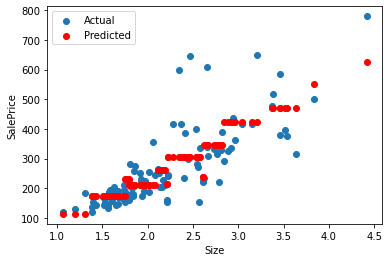

In [9]:
#plot the actual vs predicted
plt.scatter(X_test['Size'], y_test)
plt.scatter(X_test['Size'], y_pred, color='red')
plt.xlabel('Size')
plt.legend(['Actual', 'Predicted'])
plt.ylabel('SalePrice')
plt.show()

## ANN Regressor

In [10]:
# Use of ANN for predict the price of the house
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [11]:
# Importing the dataset
dataset = pd.read_csv('dataset/Realstate.csv')
dataset.head()

# replace yes with 1 and no with 0
dataset.Highway.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.Aircondition.replace(('yes', 'no'), (1, 0), inplace=True)
dataset.SwimmingPool.replace(('yes', 'no'), (1, 0), inplace=True)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [13]:
# create the ANN
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu', input_dim=8))
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=10, epochs=100)


Using TensorFlow backend.
2022-04-24 10:46:35.978646: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-24 10:46:35.979092: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Epoch 1/100
416/416 [==============================] - 0s 1ms/step - loss: 0.6826 - accuracy: 0.9183
Epoch 2/100
416/416 [==============================] - 0s 161us/step - loss: 0.6494 - accuracy: 0.9399
Epoch 3/100
416/416 [==============================] - 0s 165us/step - loss: 0.5767 - accuracy: 0.9399
Epoch 4/100
416/416 [==============================] - 0s 167us/step - loss: 0.4575 - accuracy: 0.9399
Epoch 5/100
416/416 [==============================] - 0s 147us/step - loss: 0.3440 - accuracy: 0.9399
Epoch 6/100
416/416 [==============================] - 0s 163us/step - loss: 0.2756 - accuracy: 0.9399
Epoch 7/100
416/416 [==============================] - 0s 131us/step - loss: 0.2442 - accuracy: 0.9399
Epoch 8/100
416/416 [==============================] - 0s 135us/step - loss: 0.2299 - accuracy: 0.9399
Epoch 9/100
416/416 [==============================] - 0s 133us/step - loss: 0.2228 - accuracy: 0.9399
Epoch 10/100
416/416 [==============================] - 0s 131us/step - los

In [14]:
# Predicting the Test set results
y_pred = model.predict(X_test)

#print the accuracy
print('Accuracy of ANN is: ', model.evaluate(X_test, y_test)[1])


105/105 [==============================] - 0s 611us/step
Accuracy of ANN is:  0.8952381014823914


## Conclusion

The linear regression achieves at its best 0.937 accuracy at its best.
The RF regressor achieves 0.633 accuracy at its best.
The ANN achieves 0.895 accuracy at its best.

The simplest technic looks like precise. The Linear model is the most accurate.
But the ANN allow to use every variable in the model without the ranking of combinations.

There is a lot of combinations that can be used in the model. Thus, the ANN is the most robust technic.